In [55]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt


In [56]:
sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_l2.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'] ))
    fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_mlda.h5')
mlda_samples = np.array( fin['/samples'] )
fin.close()


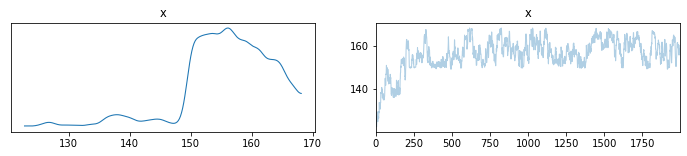

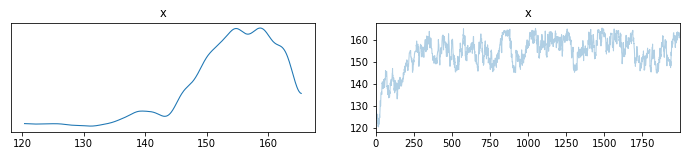

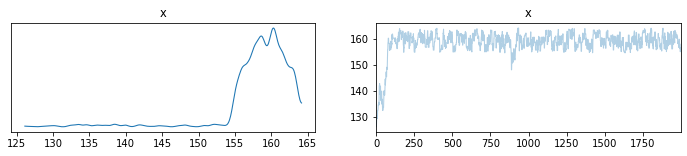

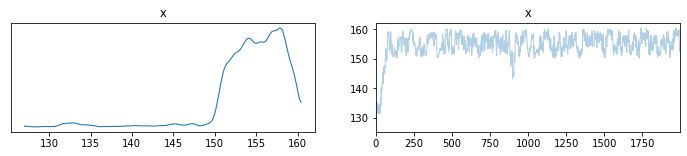

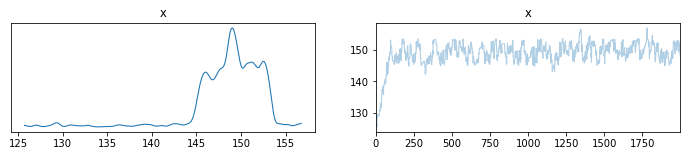

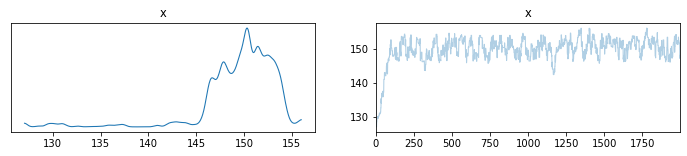

In [57]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,:])
    az.plot_trace(s[1,:])

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

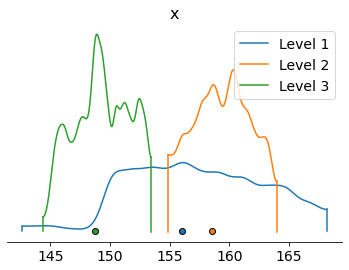

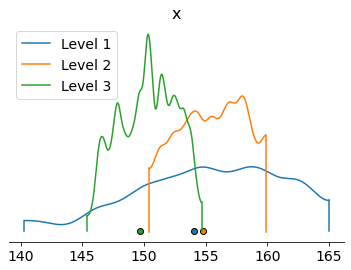

In [59]:
s0 = []
s1 = []
start = 0

data_labels = ["Level 1","Level 2","Level 3"]

for i in range(len(sample_paths)):
    s0.append(samples[i][0,start:])
    s1.append(samples[i][1,start:])

az.plot_density(s0, data_labels=data_labels)
az.plot_density(s1, data_labels=data_labels)



In [60]:
num = len(samples[0][0])
start = 300
#num = 100
point = np.array([150,150])

for i in range(len(sample_paths)):
    print("Level " + str(i) + ":")
    mean = np.mean(samples[i][:,start:num], axis=1)
    var = np.var(samples[i][:,start:num], axis=1)
    print("Mean = " + str(mean))
    #print("Variance = " + str(var))
    print("DLE = "+ str(np.linalg.norm(mean-point)))
    print("\n")

'''
print("MLDA :")
mean = np.mean(samples[4][:,start:num], axis=1)
print("Mean = " + str(mean))
print("DLE = "+ str(np.linalg.norm(mean-point)))
'''

Level 0:
Mean = [157.94519936 156.05207745]
DLE = 9.987684132680673


Level 1:
Mean = [159.23814859 155.38173855]
DLE = 10.69142175735136


Level 2:
Mean = [149.42778741 150.35955421]
DLE = 0.6758006241755744




'\nprint("MLDA :")\nmean = np.mean(samples[4][:,start:num], axis=1)\nprint("Mean = " + str(mean))\nprint("DLE = "+ str(np.linalg.norm(mean-point)))\n'

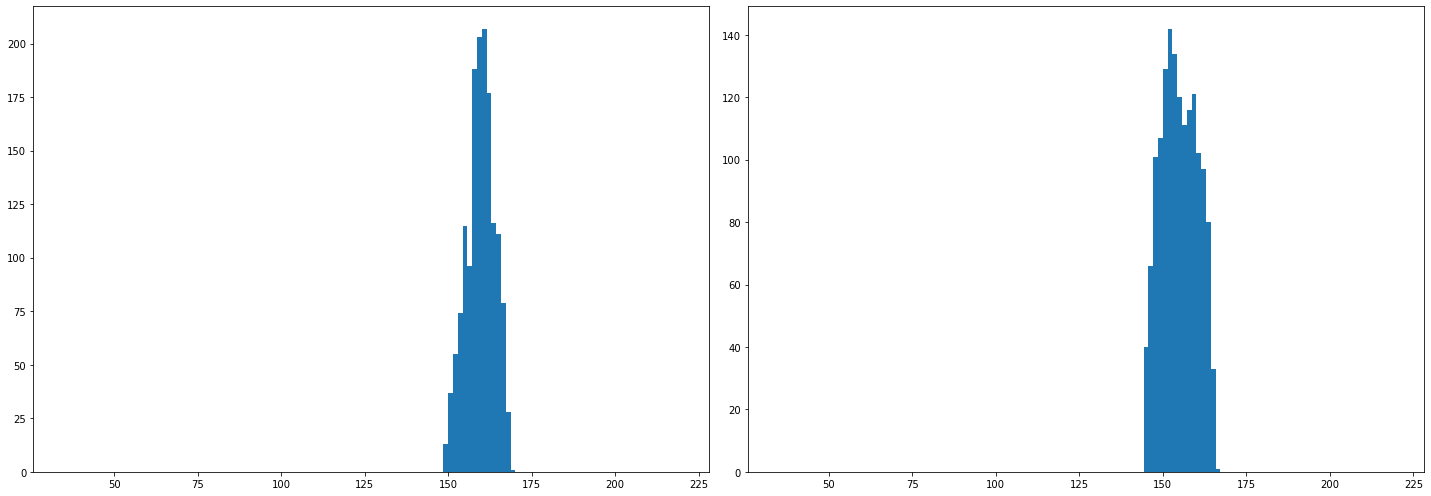

In [ ]:
fig, axs = plt.subplots(1, 2,
                        figsize =(20, 7),
                        tight_layout = True)
start = 500

plot = axs[0].hist(samples[0][0,start:], bins = 128, range = [35,219])

plot = axs[1].hist(samples[0][1,start:], bins = 128, range = [35,219])


[[127.         126.13876366 126.92530517 ... 157.18177452 160.3018685
  159.26182092]
 [127.         128.74849829 127.53401536 ... 162.40871527 162.22805598
  161.78048369]]


Text(0, 0.5, 'Samples Y')

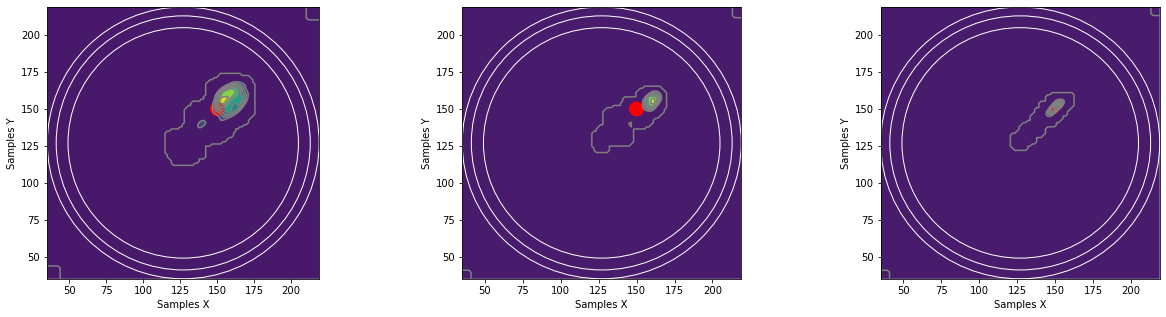

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.subplots_adjust(wspace=.5)
ax1.set_xlim(35,219)
ax1.set_ylim(35,219)
ax1.set_aspect(1)

start = 0
print(samples[0])
#samples[0].append([0,0])
az.plot_dist(np.concatenate([samples[0][0,start:],np.array([35.,219.])]),
            np.concatenate([samples[0][1,start:],np.array([35.,219.])]),
            textsize=18, ax=ax1)

for r in [78,86,92]:
    ax1.add_artist(
        pt.Circle((127,127),r,edgecolor="white",facecolor="none"))
ax1.add_artist(
    pt.Circle((150,150),5,facecolor="red"))
ax1.set_xlabel('Samples X')
ax1.set_ylabel('Samples Y')

az.plot_dist(np.concatenate([samples[1][0,start:],np.array([35.,219.])]),
            np.concatenate([samples[1][1,start:],np.array([35.,219.])]),
            textsize=18, ax=ax2)

for r in [78,86,92]:
    ax2.add_artist(
        pt.Circle((127,127),r,edgecolor="white",facecolor="none"))
ax2.add_artist(
    pt.Circle((150,150),5,facecolor="red"))
ax2.set_xlabel('Samples X')
ax2.set_ylabel('Samples Y')

az.plot_dist(np.concatenate([samples[2][0,start:],np.array([35.,219.])]),
            np.concatenate([samples[2][1,start:],np.array([35.,219.])]),
            textsize=18, ax=ax3)

for r in [78,86,92]:
    ax3.add_artist(
        pt.Circle((127,127),r,edgecolor="white",facecolor="none"))
ax3.add_artist(
    pt.Circle((150,150),3,facecolor="red"))
ax3.set_xlabel('Samples X')
ax3.set_ylabel('Samples Y')

Text(0, 0.5, 'Samples Y')

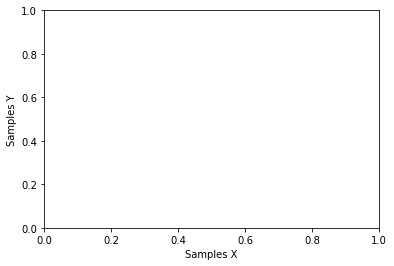

In [65]:
fig, ax = plt.subplots(1,1)

az.plot_dist(np.concatenate([mlda_samples[0,start:],np.array([35.,219.])]),
            np.concatenate([mlda_samples[1,start:],np.array([35.,219.])]),
            textsize=18, ax=ax3)

for r in [78,86,92]:
    ax.add_artist(
        pt.Circle((127,127),r,edgecolor="white",facecolor="none"))
ax.add_artist(
    pt.Circle((150,150),3,facecolor="red"))
ax.set_xlabel('Samples X')
ax.set_ylabel('Samples Y')